In [1]:
sys.path.insert(0, './common')

import sys
import wave
import a2c_model

c:\Users\nathan\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
env_path = 'env01/Wave'

In [3]:
env = wave.WaveEnv(env_path, worker_id=2)

WAVE environment created.


In [4]:
hidden_layer = 512
model = a2c_model.A2C(127, 2, hidden_layer, lr=3e-4)

In [6]:
save_path = './results/env01/a2c/512-unite-nstep'
model.set_model_save_path(save_path)

In [12]:
model.load_model()

Model loaded
Training history loaded


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


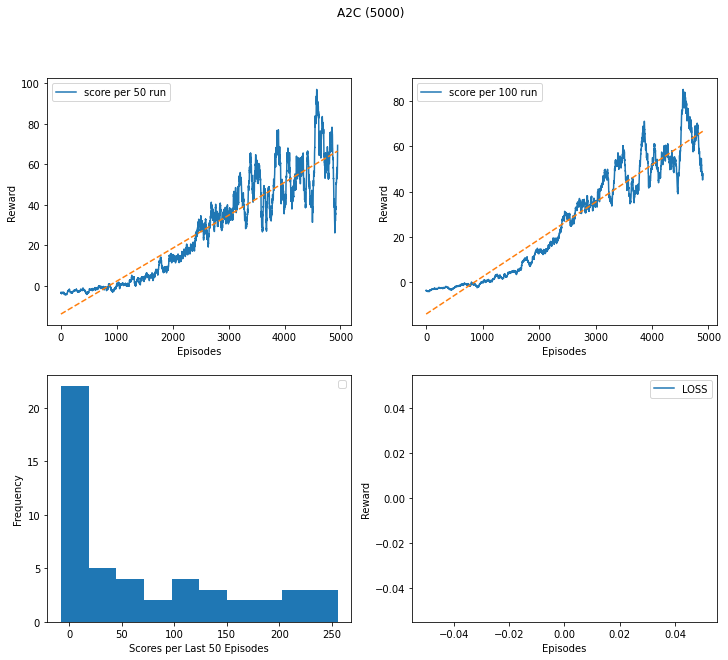

Model saved
Training history saved
saved to ./results/env01/a2c/512-unite-nstep
EPOCH: 4999, total reward: 229.99996733665466, timestep: 1000


In [7]:
model.set_train_params(max_step=1000, plot_smooth=50, gamma=0.99)
model.train(env, 5000, show_plot=True)

In [7]:
model.save_model()

Training history saved


In [3]:
import saver
saver.save_wave_model(hidden_layer, f'{save_path}/actor.pth', f'{save_path}/model.onnx')

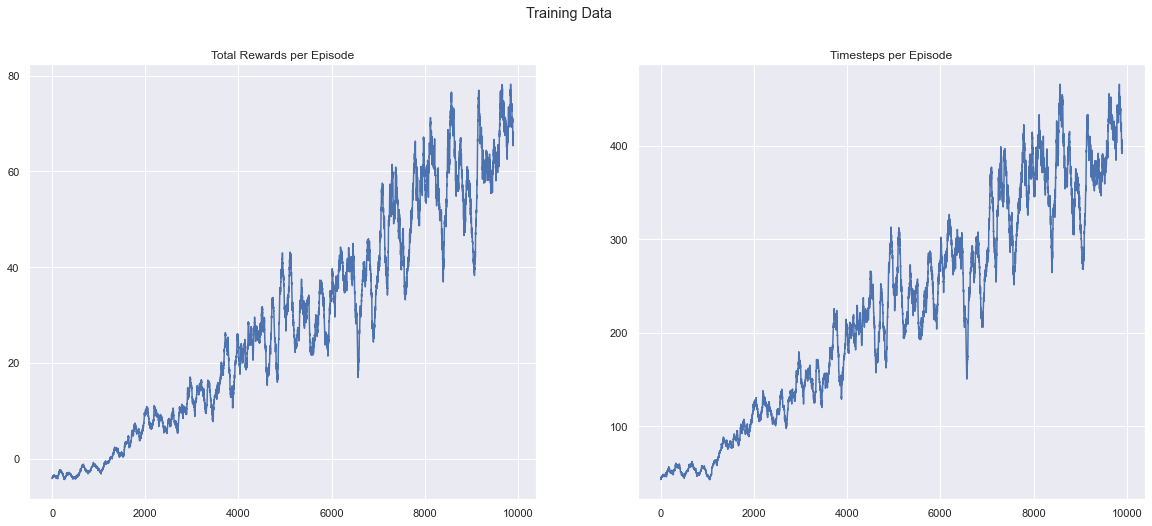

In [7]:
model.plot_train_memory(smooth=100)

In [21]:
env = wave.WaveEnv(env_path, 5, worker_id=2)
model.test(env)

WAVE environment created.


(291.5699602663517, 1469)

In [17]:
model.test_avg(env, 100)

-6.189999893307686 24
172.97997587919235 841
362.07995292544365 1859
321.50996470451355 1570
91.17998725175858 477
503.0699387192726 2839
1264.1398411691189 5718
66.17999203503132 477
741.6398925483227 3568
970.7398784309626 4486
-3.1100010871887207 163
1355.2898258417845 6295
324.6299555450678 1608
616.1899280548096 2777
91.77998504042625 665
378.9299484193325 1822
58.069993034005165 439
1493.1698099523783 7137
584.299927085638 2914
2242.2497135698795 10655
50.55999590456486 389
879.0098855793476 4020
104.27998879551888 615
388.8999503105879 1922
266.5999664962292 1468
370.1399509757757 1898
18.119995802640915 238
1340.9898385703564 6081
275.89997187256813 1482
378.33995048701763 1734
424.5699437558651 2009
842.0599005073309 4159
219.1599743962288 1117
210.41997435688972 992
690.459923222661 3391
-6.919999867677689 39
558.2199318706989 2436
-6.230000138282776 25
106.80998808145523 464
593.7099277079105 2726
11.299997448921204 174
114.22998364269733 616
6.989998042583466 161
205.309973

([-6.189999893307686,
  172.97997587919235,
  362.07995292544365,
  321.50996470451355,
  91.17998725175858,
  503.0699387192726,
  1264.1398411691189,
  66.17999203503132,
  741.6398925483227,
  970.7398784309626,
  -3.1100010871887207,
  1355.2898258417845,
  324.6299555450678,
  616.1899280548096,
  91.77998504042625,
  378.9299484193325,
  58.069993034005165,
  1493.1698099523783,
  584.299927085638,
  2242.2497135698795,
  50.55999590456486,
  879.0098855793476,
  104.27998879551888,
  388.8999503105879,
  266.5999664962292,
  370.1399509757757,
  18.119995802640915,
  1340.9898385703564,
  275.89997187256813,
  378.33995048701763,
  424.5699437558651,
  842.0599005073309,
  219.1599743962288,
  210.41997435688972,
  690.459923222661,
  -6.919999867677689,
  558.2199318706989,
  -6.230000138282776,
  106.80998808145523,
  593.7099277079105,
  11.299997448921204,
  114.22998364269733,
  6.989998042583466,
  205.30997347831726,
  220.96997319161892,
  -6.150000125169754,
  1005.7198

In [ ]:
# A2C 10,000 EPOCH (121.22258364647627, 638.93)
# A2C 20,000 EPOCH (480.5063384319842, 2308.27)
# A2C 20,000 EPOCH 2 (387.9843504935503, 1894.74)

In [18]:
env.close()